✅ Dataset loaded successfully.
📊 Data Shape: (284807, 31)

🔍 Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

✅ Evaluation Metrics:
Accuracy: 0.9995611109160493

Confusion Matrix:
 [[56862     2]
 [   23    75]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



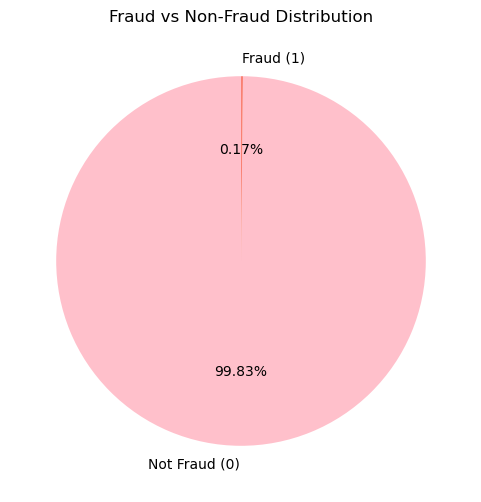

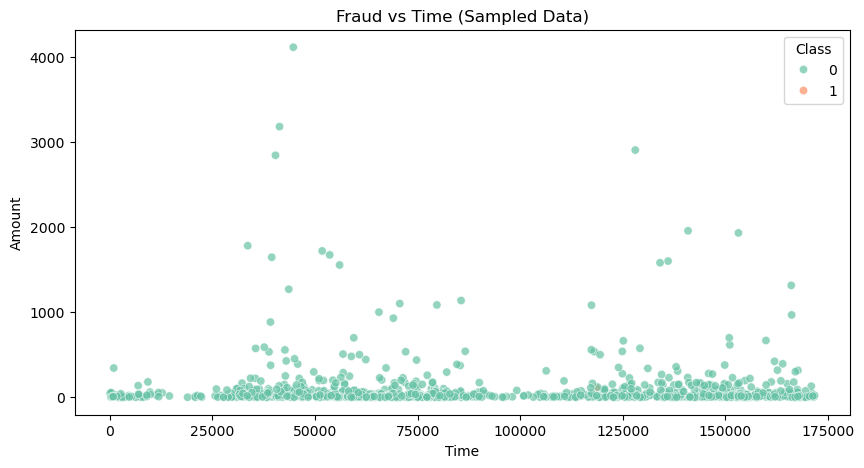

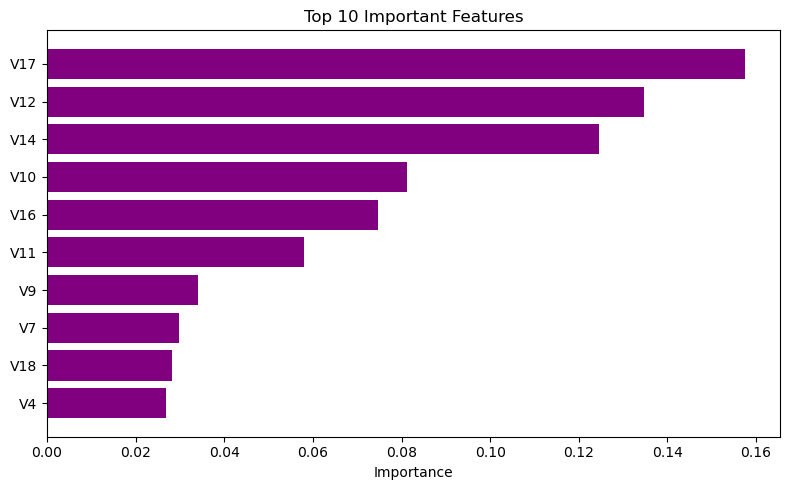

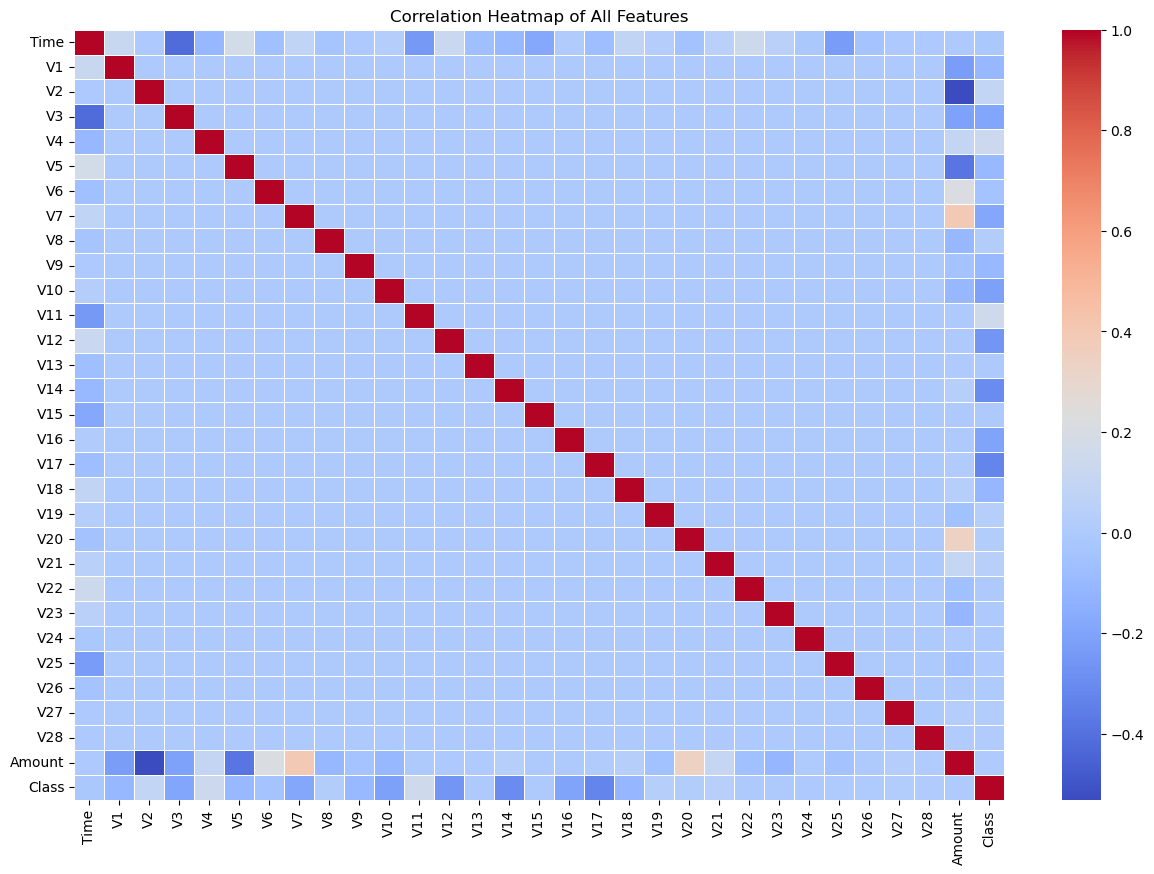

In [2]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Load the dataset
try:
    df = pd.read_csv("creditcard.csv")  # Make sure the file is in the same folder
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ ERROR: File 'creditcard.csv' not found. Please check the file location.")
    exit()

# Step 3: Print basic info
print("📊 Data Shape:", df.shape)

# Step 4: Print class distribution
print("\n🔍 Class Distribution:")
print(df["Class"].value_counts())

# Step 5: Split data into features (X) and target (y)
x = df.drop("Class", axis=1)
y = df["Class"]

# Step 6: Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 7: Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Step 8: Make predictions
predictions = model.predict(x_test)

# Step 9: Evaluate the model
print("\n✅ Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))



# Fraud vs Non Fraud Pie chart
fraud_counts = df["Class"].value_counts()
labels = ['Not Fraud (0)', 'Fraud (1)']
colors = ['pink', 'salmon']

plt.figure(figsize=(6,6))
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


#  Fraud vs Time Scatter Plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df.sample(1000), x='Time', y='Amount', hue='Class', alpha=0.7, palette='Set2')
plt.title("Fraud vs Time (Sampled Data)")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(title="Class", loc='upper right')
plt.savefig("scatter.png", dpi=300, bbox_inches='tight')
plt.show()


# Using Horizontal Bar Plot Top 10 important Features
importances = model.feature_importances_
features = x.columns

top10 = sorted(zip(importances, features), reverse=True)[:10]

scores = [x[0] for x in top10]
names = [x[1] for x in top10]

plt.figure(figsize=(8,5))
plt.barh(names, scores, color='purple')
plt.xlabel("Importance")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.savefig("bar.png", dpi=300, bbox_inches='tight')
plt.show()


#  Heatmap of Full Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of All Features")
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

